<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" align="left">
<img src="http://pydata.org/static/base/includes/images/pydatalogo-generic.png" align="center">

<img src="http://northmate.com/wp-content/uploads/grass_01.jpg" align="center">

<img src="http://ww2.sinaimg.cn/large/5396ee05jw1etyjkwzuo3j20jn0estco.jpg" align="right">

## What is the PyData ecosystem? 

- A collection of Python tooling and packages geared towards scientific computing


- Collaboration and reproducability are key concepts

    - Let's talk about Anaconda
    
    - Let's talk about Jupyter (**Ju**[lia] **Pyt**[hon] e**R**)
    

- Why use Python when C/Fortran/etc. are faster?

    - Why drive a car to work when an airplane is faster?
    
    - Python is general purpose
    
    - NumPy seriously rocks, seriously
    
    - Python is glue
    
    - Python is eating the world

<img src="http://experiencelife.com/wp-content/uploads/2012/09/Oct12_qigong-standing-still-absorbing.jpg" align="left">

# Don't dance with yourself!

#### Brace yourslef, strange analogy ahead

- Not keeping up-to-date on tooling and packages is a lot like dancing with yourself
- It's [arguably] not as much fun and not terribly efficient
- Join the party and keep tabs on relevant package updates to keep productivity up

## Good ol' Pandas

<img src="http://pandas.pydata.org/_static/pandas_logo.png" align="right">

Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R.

*  **Fast, in-memory**: Great solution for small-medium sized data
*  **Excellent time series functionality**: Handles dates and times effortlessly and supports a host of windowing functions
*  **Split-apply-combine**:  Complex aggregations can be accomplished in a single line of code, pivoting too
*  **Vectorizec computation**:  Via map(), apply(), and applymap()
*  **Imputation is a breeze**:  Several convenient strategies for handling missing values

In [48]:
from numpy.random import randn
from pandas import DataFrame

# make some data
df = DataFrame(randn(1000, 2), columns=list('ab'))
print df.shape
df.head()

(1000, 2)


,a,b
0,0.403767,-0.302995
1,-1.146725,-0.610351
2,-0.016351,0.013495
3,0.678291,0.511574
4,-1.038411,-0.254266


In [57]:
# descriptive stats are easy
df.describe()

,a,b,c
count,1000.000000,1000.000000,1000.000000
mean,0.038272,0.002440,0.078310
std,0.977107,0.996147,3.936207
min,-2.816163,-3.284599,-13.009097
25%,-0.642462,-0.604983,-2.522210
50%,-0.005423,-0.005124,0.033662
75%,0.659378,0.658136,2.679224
max,3.411294,2.766058,12.227289


In [49]:
# 0 is the mean of the normal distribution you are choosing from
# 4 is the standard deviation of the normal distribution
# 10000 is the number of elements you get in array noise
df['c'] = np.random.normal(0,4,1000)

# remove observations outside of 3 standard deviations
df2 = df[np.abs(df.c-df.c.mean())<=(3*df.c.std())] 
print df2.shape

(997, 3)


In [51]:
# simple filtering
df3 = df.query('a > b') #df3 = df[df.a > df.b]
print df3.shape

(508, 3)


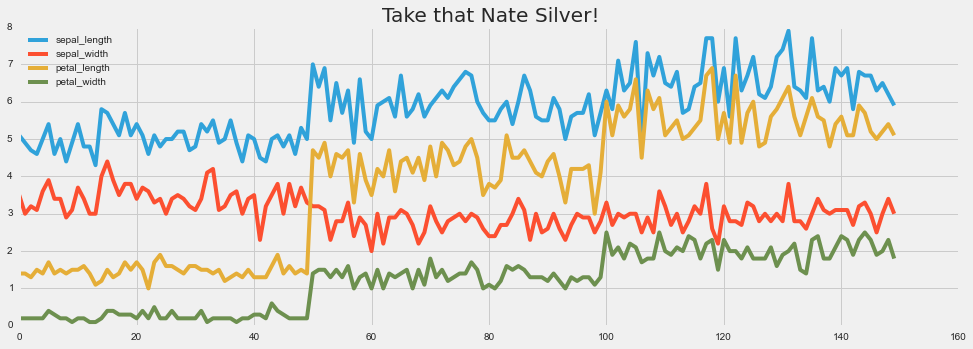

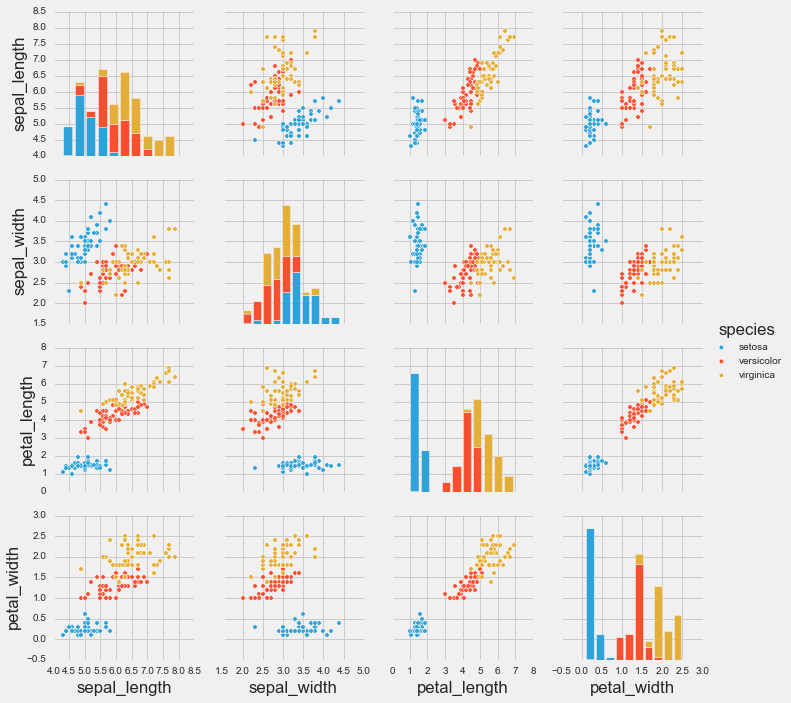

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
df = sns.load_dataset("iris")

plt.style.use('fivethirtyeight')

# simple plotting
df.plot(figsize=(15,5), title='Take that Nate Silver!')
sns.pairplot(df, hue="species")

## Dask

<img src="http://xray.readthedocs.org/en/stable/_images/dask_array.png" width="25%" align="right">

Dask array provides a parallel, larger-than-memory, n-dimensional array using blocked algorithms.

*  **Parallel**: Uses all of the cores on your computer
*  **Larger-than-memory**:  Lets you work on datasets that are larger than your available memory by breaking up your array into many small pieces, operating on those pieces in an order that minimizes the memory footprint of your computation, and effectively streaming data from disk.
*  **Blocked Algorithms**:  Perform large computations by performing many smaller computations

**Related Documentation**

* http://dask.readthedocs.org/en/latest/array.html
* http://dask.readthedocs.org/en/latest/array-api.html

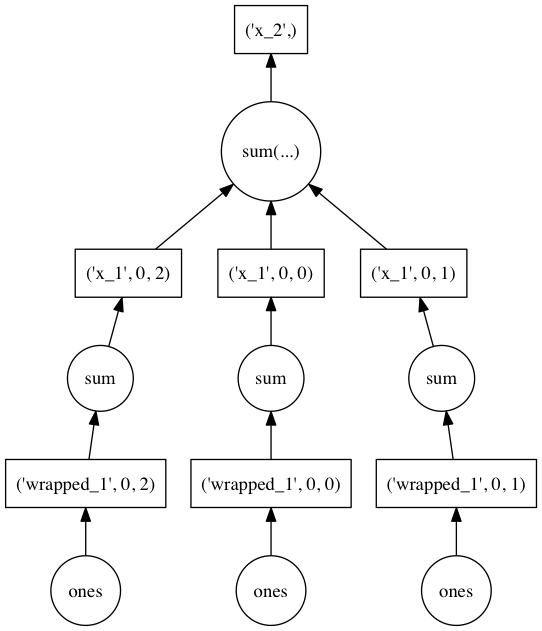

In [2]:
import dask.array as da
import numpy as np
from dask.dot import dot_graph

x = da.ones((5, 15), chunks=(5, 5))
expr = x.sum()
expr._visualize()

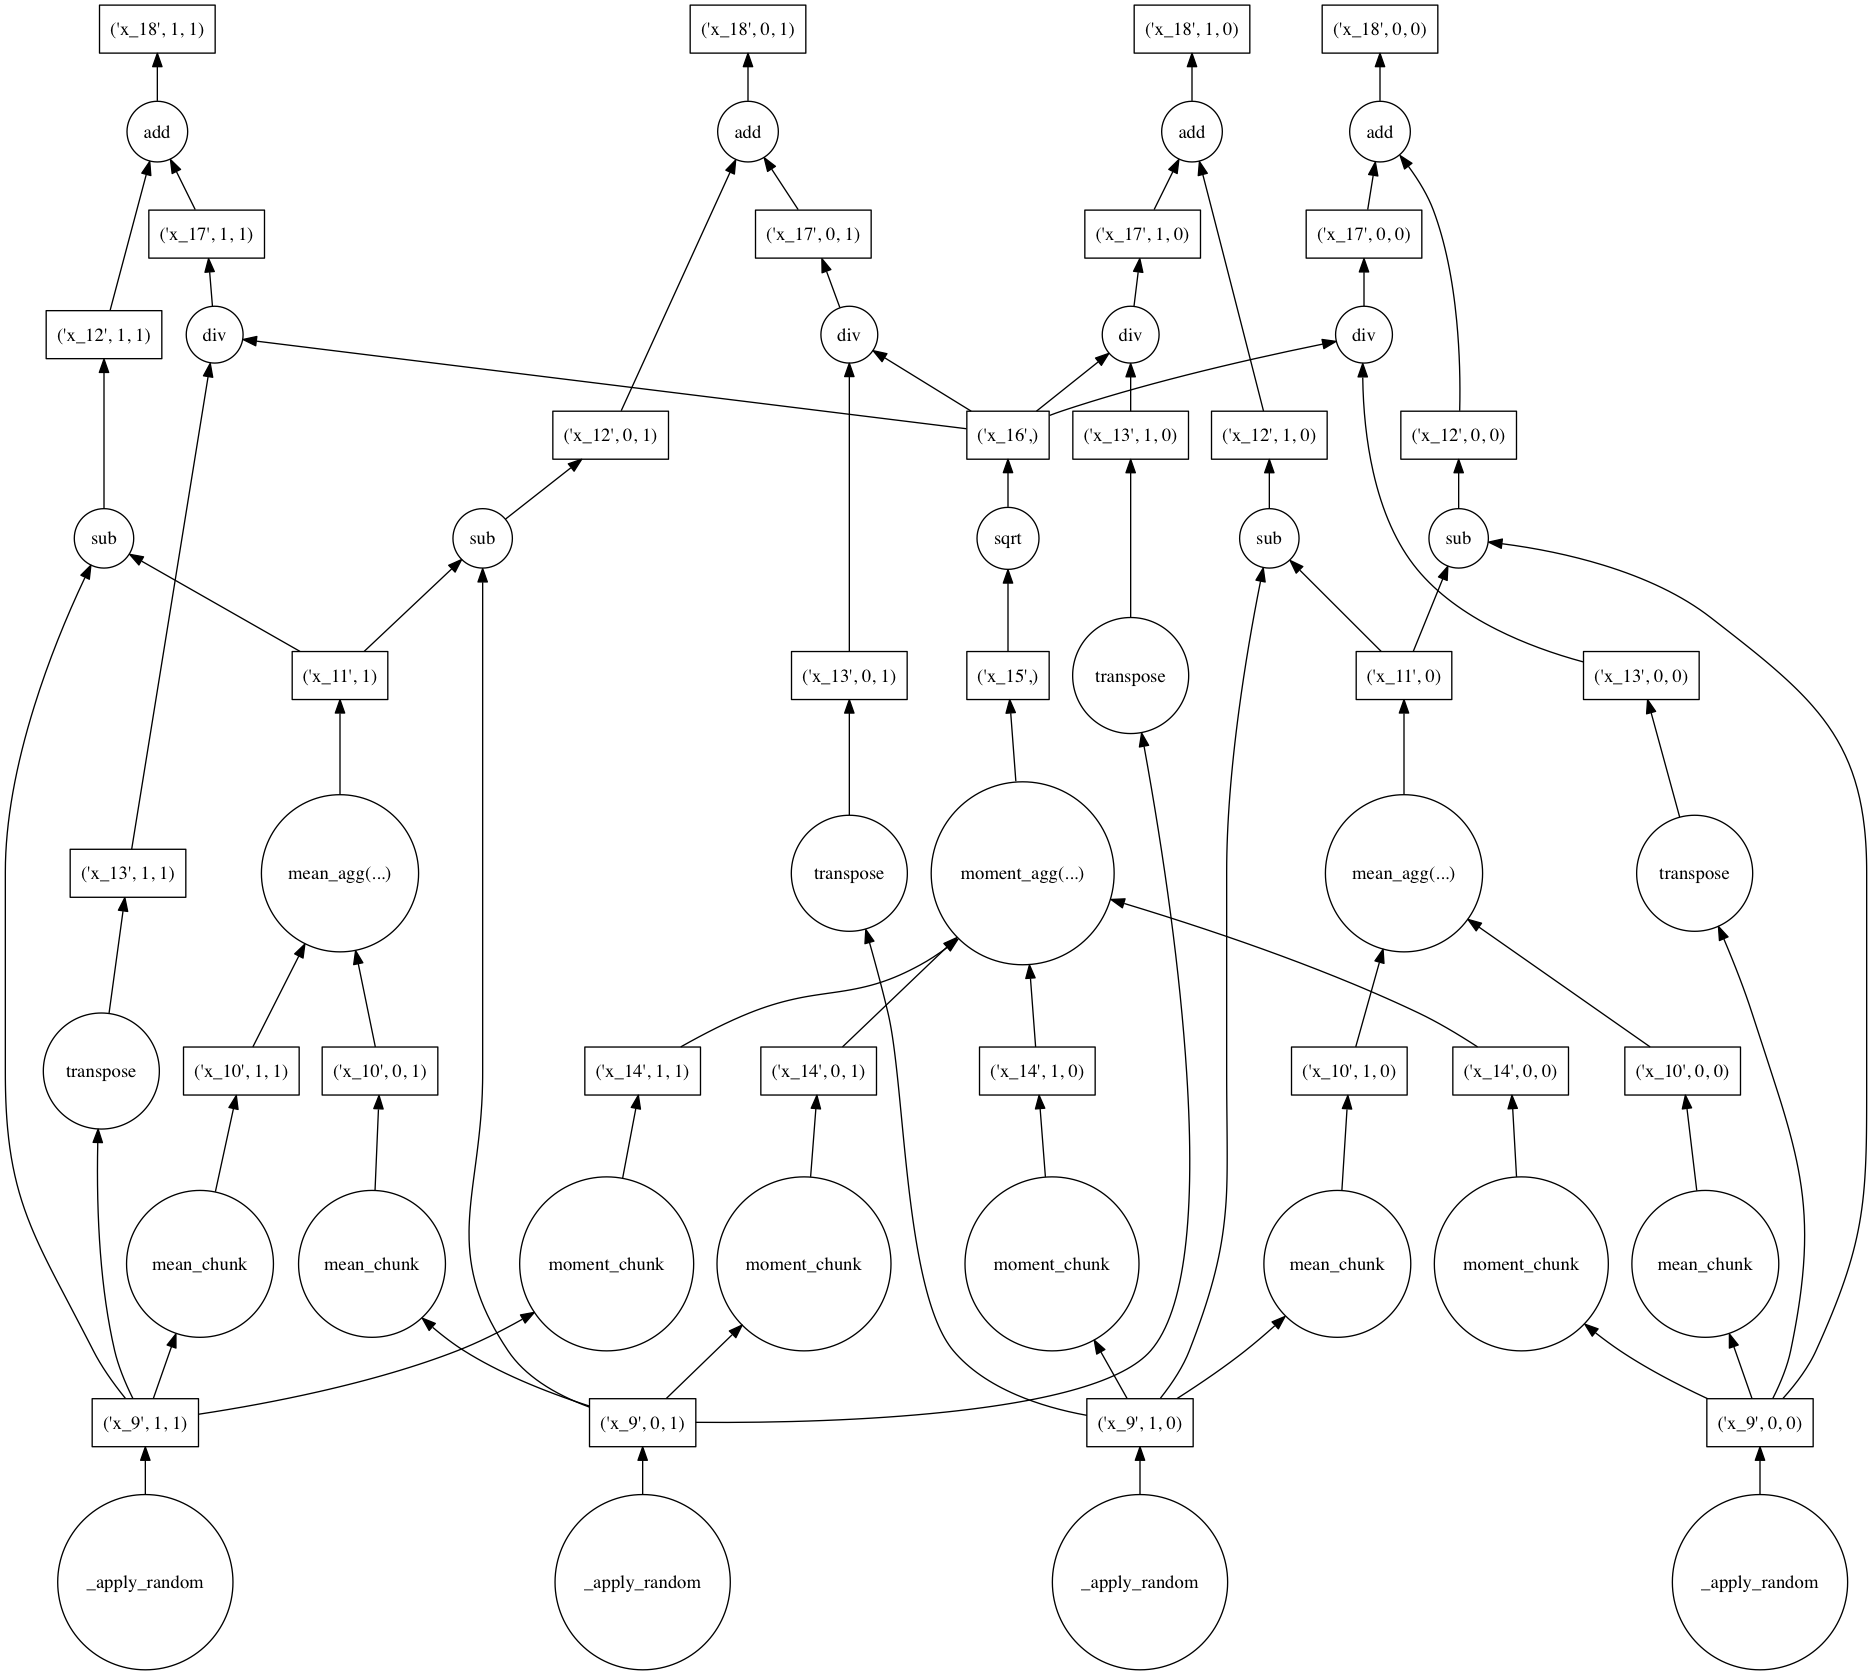

In [6]:
# 400 million element array 
# Cut into 1000x1000 sized chunks
x = da.random.normal(10, 0.1, size=(2000, 2000), chunks=(1000, 1000))
expr = (x - x.mean(axis=0)) + (x.T / x.std())
expr._visualize()

## xray

<img src="http://xray.readthedocs.org/en/stable/_images/dataset-diagram-logo.png" width="50%" align="right">

- xray aims to bring the labeled data power of pandas to the physical sciences, by providing N-dimensional variants of the core pandas data structures

- The goal is to provide a pandas-like and pandas-compatible toolkit for analytics on multi-dimensional arrays, rather than the tabular data for which pandas excels. 

- The approach adopts the Common Data Model for self- describing scientific data in widespread use in the Earth sciences: xray.Dataset is an in-memory representation of a netCDF file.

In [74]:
import xray

# create an xray array
data = xray.DataArray(np.random.randn(2, 3), [('x', ['a', 'b']), ('y', [-2, 0, 2])])
data

<xray.DataArray (x: 2, y: 3)>
array([[-0.00722784,  0.33649743, -0.97661756],
       [ 0.02176426, -0.80608982, -0.62810497]])
Coordinates:
  * x        (x) |S1 'a' 'b'
  * y        (y) int64 -2 0 2

In [75]:
# like in pandas, values is a numpy array that you can modify in-place
data.values

array([[-0.00722784,  0.33649743, -0.97661756],
       [ 0.02176426, -0.80608982, -0.62810497]])

In [76]:
# get array dimensions
data.dims

('x', 'y')

In [77]:
# get coordinates
data.coords

Coordinates:
  * x        (x) |S1 'a' 'b'
  * y        (y) int64 -2 0 2

In [79]:
# you can use this dictionary to store arbitrary metadata
data.attrs

OrderedDict()

## Seaborn

<img src="http://www.juno-books.com/i/seaborn245.jpg" width="20%" align="right">

- Seaborn is a Python visualization library based on matplotlib


- It provides a high-level interface for drawing attractive statistical graphics


- It has some seriously powerful visualizations


- Checkout the gallery: http://web.stanford.edu/~mwaskom/software/seaborn/examples/index.html

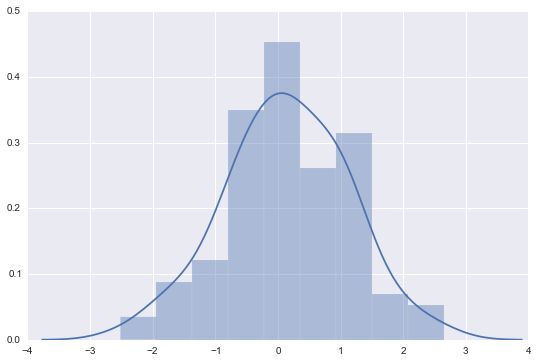

In [70]:
import seaborn as sns
x = np.random.normal(size=100)
sns.distplot(x);

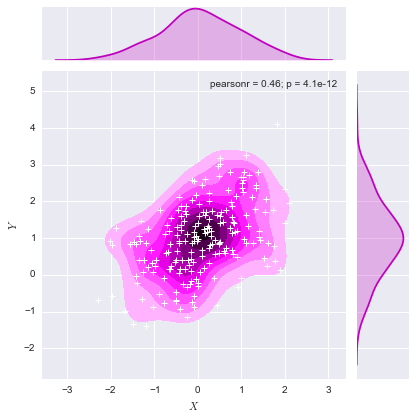

In [67]:
sns.set(style="darkgrid")

mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

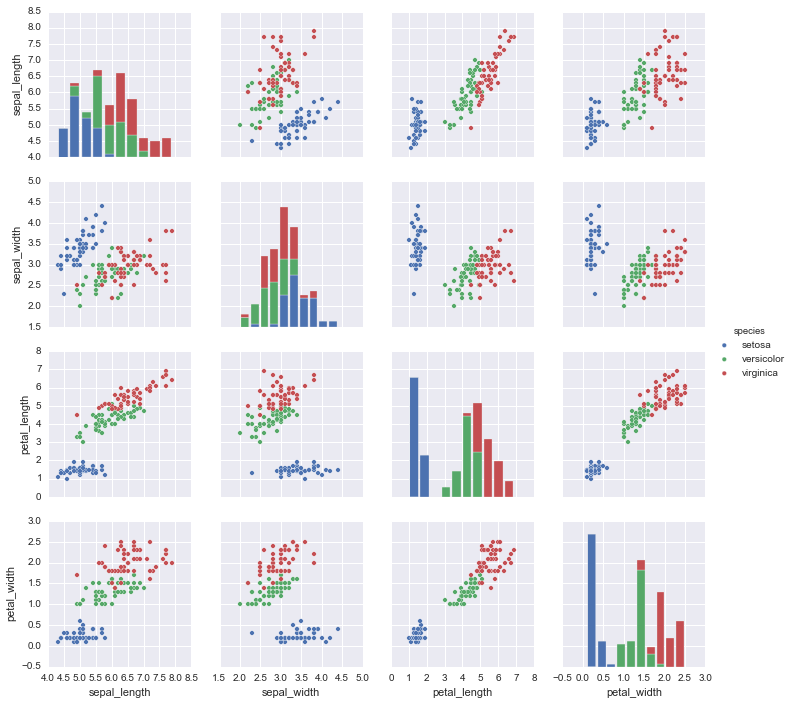

In [69]:
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

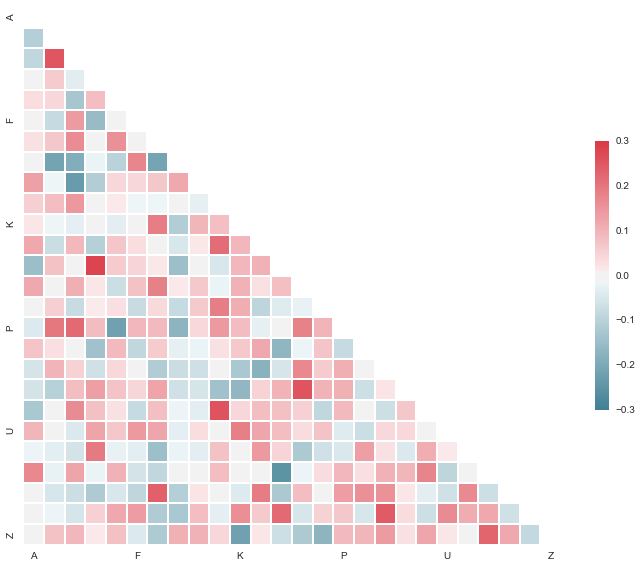

In [59]:
from string import letters

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(letters[:26]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

<img src="http://multithreaded.stitchfix.com/assets/images/blog/pyxley_examples_grid.png" width="50%" align="right">


## Data Spyre / Pyxley

#### R Shiny has met it's match, kind of

Spyre is a Web Application Framework for providing a simple user interface for Python data projects.

Spyre runs on the minimalist python web framework, cherrypy, with jinja2 templating. Spyre is all about data and data visualization, so you'll also need pandas and matplotlib.

Try me: http://adamhajari.com/

The Pyxley python library makes use of the pyxleyJS React components to create Flask-based web applications. Through the use of the PyReact library, we can use Jinja templating to construct and transform a single React component. The specific UI components are passed as props to the parent component. A simpler interface is provide through the use of specific wrappers for each of the component types.

In [80]:
from spyre import server
import cherrypy
cherrypy.config.update({'server.socket_host': '0.0.0.0'})

In [81]:
# tested with python2.7 and 3.4
from matplotlib.dates import DateFormatter
import json
from datetime import datetime
try:
	import urllib2
except ImportError:
	import urllib.request as urllib2

from bokeh.resources import INLINE
from bokeh.resources import CDN
from bokeh.embed import components
from bokeh import plotting

class StocksWithBokeh(server.App):
	title = "Historical Stock Prices"

	inputs = [{	"type":'dropdown',
				"label": 'Company', 
				"options" : [
					{"label": "Choose A Company", "value":"empty"},
					{"label": "Google", "value":"GOOG", "checked":True},
					{"label": "Yahoo", "value":"YHOO"},
					{"label": "Apple", "value":"AAPL"}],
				"key": 'ticker', 
				"action_id": "update_data",
				"linked_key":'custom_ticker',
				"linked_type":'text',
			},
			{	"type":'text',
				"label": 'or enter a ticker symbol', 
				"key": 'custom_ticker', 
				"action_id": "update_data",
				"linked_key":'ticker',
				"linked_type":'dropdown',
				"linked_value":'empty' }]

	controls = [{"type" : "hidden",
					"label" : "get historical stock prices",
					"id" : "update_data" 
				}]

	outputs = [{"type" : "plot",
					"id" : "plot",
					"control_id" : "update_data",
					"tab" : "Plot"},
				{"type" : "table",
					"id" : "table_id",
					"control_id" : "update_data",
					"tab" : "Table"},
				{"type" : "html",
					"id" : "html_id",
					"control_id" : "update_data",
					"tab" : "Bokeh"}]

	tabs = ["Plot", "Table", "Bokeh"]

	def getData(self, params):
		ticker = params['ticker']
		if ticker=='empty':
				ticker=params['custom_ticker']
		# make call to yahoo finance api to get historical stock data
		api_url = 'https://chartapi.finance.yahoo.com/instrument/1.0/{}/chartdata;type=quote;range=3m/json'.format(ticker)
		result = urllib2.urlopen(api_url).read()
		data = json.loads(result.decode('utf-8').replace('finance_charts_json_callback( ','')[:-1])  # strip away the javascript and load json
		self.company_name = data['meta']['Company-Name']
		df = pd.DataFrame.from_records(data['series'])
		df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d')
		return df

	def getPlot(self, params):
		df = self.getData(params)
		plt_obj = df.set_index('Date').drop(['volume'],axis=1).plot()
		plt_obj.set_ylabel("Price")
		plt_obj.set_title(self.company_name)
		fig = plt_obj.get_figure()
		return fig

	def getHTML(self,params):
		df = self.getData(params)  # get data
		try:
			bokeh_plot = plotting.line(df['Date'],df['close'], color='#1c2980', legend="close", x_axis_type = "datetime", title=self.company_name)
		except AttributeError:
			bokeh_plot = plotting.figure(x_axis_type='datetime', title=self.company_name)
			bokeh_plot.line(df['Date'],df['close'], color='#1c2980', legend="close")
		bokeh_plot.line(df['Date'],df['high'], color='#80641c', legend="high")
		bokeh_plot.line(df['Date'],df['low'], color='#80321c', legend="low")

		script, div = components(bokeh_plot, CDN)
		html = "%s\n%s"%(script, div)
		return html

	def getCustomJS(self):
		return INLINE.js_raw[0]

	def getCustomCSS(self):
		return INLINE.css_raw[0]

if __name__ == '__main__':
	ml = StocksWithBokeh()
	ml.launch(port=9097)

## VisPy

VisPy is a Python library for interactive scientific visualization that is designed to be fast, scalable, and easy to use.

- GPU accelerated

- Million points, real-time

- Antigrain rendering

In [22]:
from vispy import gloo
from vispy import app
import math

# Number of cols and rows in the table.
nrows = 16
ncols = 20

# Number of signals.
m = nrows*ncols

# Number of samples per signal.
n = 1000

# Various signal amplitudes.
amplitudes = .1 + .2 * np.random.rand(m, 1).astype(np.float32)

# Generate the signals as a (m, n) array.
y = amplitudes * np.random.randn(m, n).astype(np.float32)

# Color of each vertex (TODO: make it more efficient by using a GLSL-based
# color map and the index).
color = np.repeat(np.random.uniform(size=(m, 3), low=.5, high=.9),
                  n, axis=0).astype(np.float32)

# Signal 2D index of each vertex (row and col) and x-index (sample index
# within each signal).
index = np.c_[np.repeat(np.repeat(np.arange(ncols), nrows), n),
              np.repeat(np.tile(np.arange(nrows), ncols), n),
              np.tile(np.arange(n), m)].astype(np.float32)

VERT_SHADER = """
#version 120
// y coordinate of the position.
attribute float a_position;
// row, col, and time index.
attribute vec3 a_index;
varying vec3 v_index;
// 2D scaling factor (zooming).
uniform vec2 u_scale;
// Size of the table.
uniform vec2 u_size;
// Number of samples per signal.
uniform float u_n;
// Color.
attribute vec3 a_color;
varying vec4 v_color;
// Varying variables used for clipping in the fragment shader.
varying vec2 v_position;
varying vec4 v_ab;
void main() {
    float nrows = u_size.x;
    float ncols = u_size.y;
    // Compute the x coordinate from the time index.
    float x = -1 + 2*a_index.z / (u_n-1);
    vec2 position = vec2(x - (1 - 1 / u_scale.x), a_position);
    // Find the affine transformation for the subplots.
    vec2 a = vec2(1./ncols, 1./nrows)*.9;
    vec2 b = vec2(-1 + 2*(a_index.x+.5) / ncols,
                  -1 + 2*(a_index.y+.5) / nrows);
    // Apply the static subplot transformation + scaling.
    gl_Position = vec4(a*u_scale*position+b, 0.0, 1.0);
    v_color = vec4(a_color, 1.);
    v_index = a_index;
    // For clipping test in the fragment shader.
    v_position = gl_Position.xy;
    v_ab = vec4(a, b);
}
"""

FRAG_SHADER = """
#version 120
varying vec4 v_color;
varying vec3 v_index;
varying vec2 v_position;
varying vec4 v_ab;
void main() {
    gl_FragColor = v_color;
    // Discard the fragments between the signals (emulate glMultiDrawArrays).
    if ((fract(v_index.x) > 0.) || (fract(v_index.y) > 0.))
        discard;
    // Clipping test.
    vec2 test = abs((v_position.xy-v_ab.zw)/v_ab.xy);
    if ((test.x > 1) || (test.y > 1))
        discard;
}
"""


class Canvas(app.Canvas):
    def __init__(self):
        app.Canvas.__init__(self, title='Use your wheel to zoom!',
                            keys='interactive')
        self.program = gloo.Program(VERT_SHADER, FRAG_SHADER)
        self.program['a_position'] = y.reshape(-1, 1)
        self.program['a_color'] = color
        self.program['a_index'] = index
        self.program['u_scale'] = (1., 1.)
        self.program['u_size'] = (nrows, ncols)
        self.program['u_n'] = n

        gloo.set_viewport(0, 0, *self.physical_size)

        self._timer = app.Timer('auto', connect=self.on_timer, start=True)

        gloo.set_state(clear_color='black', blend=True,
                       blend_func=('src_alpha', 'one_minus_src_alpha'))

        self.show()

    def on_resize(self, event):
        gloo.set_viewport(0, 0, *event.physical_size)

    def on_mouse_wheel(self, event):
        dx = np.sign(event.delta[1]) * .05
        scale_x, scale_y = self.program['u_scale']
        scale_x_new, scale_y_new = (scale_x * math.exp(2.5*dx),
                                    scale_y * math.exp(0.0*dx))
        self.program['u_scale'] = (max(1, scale_x_new), max(1, scale_y_new))
        self.update()

    def on_timer(self, event):
        """Add some data at the end of each signal (real-time signals)."""
        k = 10
        y[:, :-k] = y[:, k:]
        y[:, -k:] = amplitudes * np.random.randn(m, k)

        self.program['a_position'].set_data(y.ravel().astype(np.float32))
        self.update()

    def on_draw(self, event):
        gloo.clear()
        self.program.draw('line_strip')


c = Canvas()
app.run()

0

## Very noteworthy mentions

- Sci-kit Learn

- PySpark 

- Theano

- SGrpah, SFrame

## Someone [usually] has said it better

- https://www.youtube.com/watch?v=RTiAMB2tQjo
    
- https://www.youtube.com/watch?v=5GlNDD7qbP4